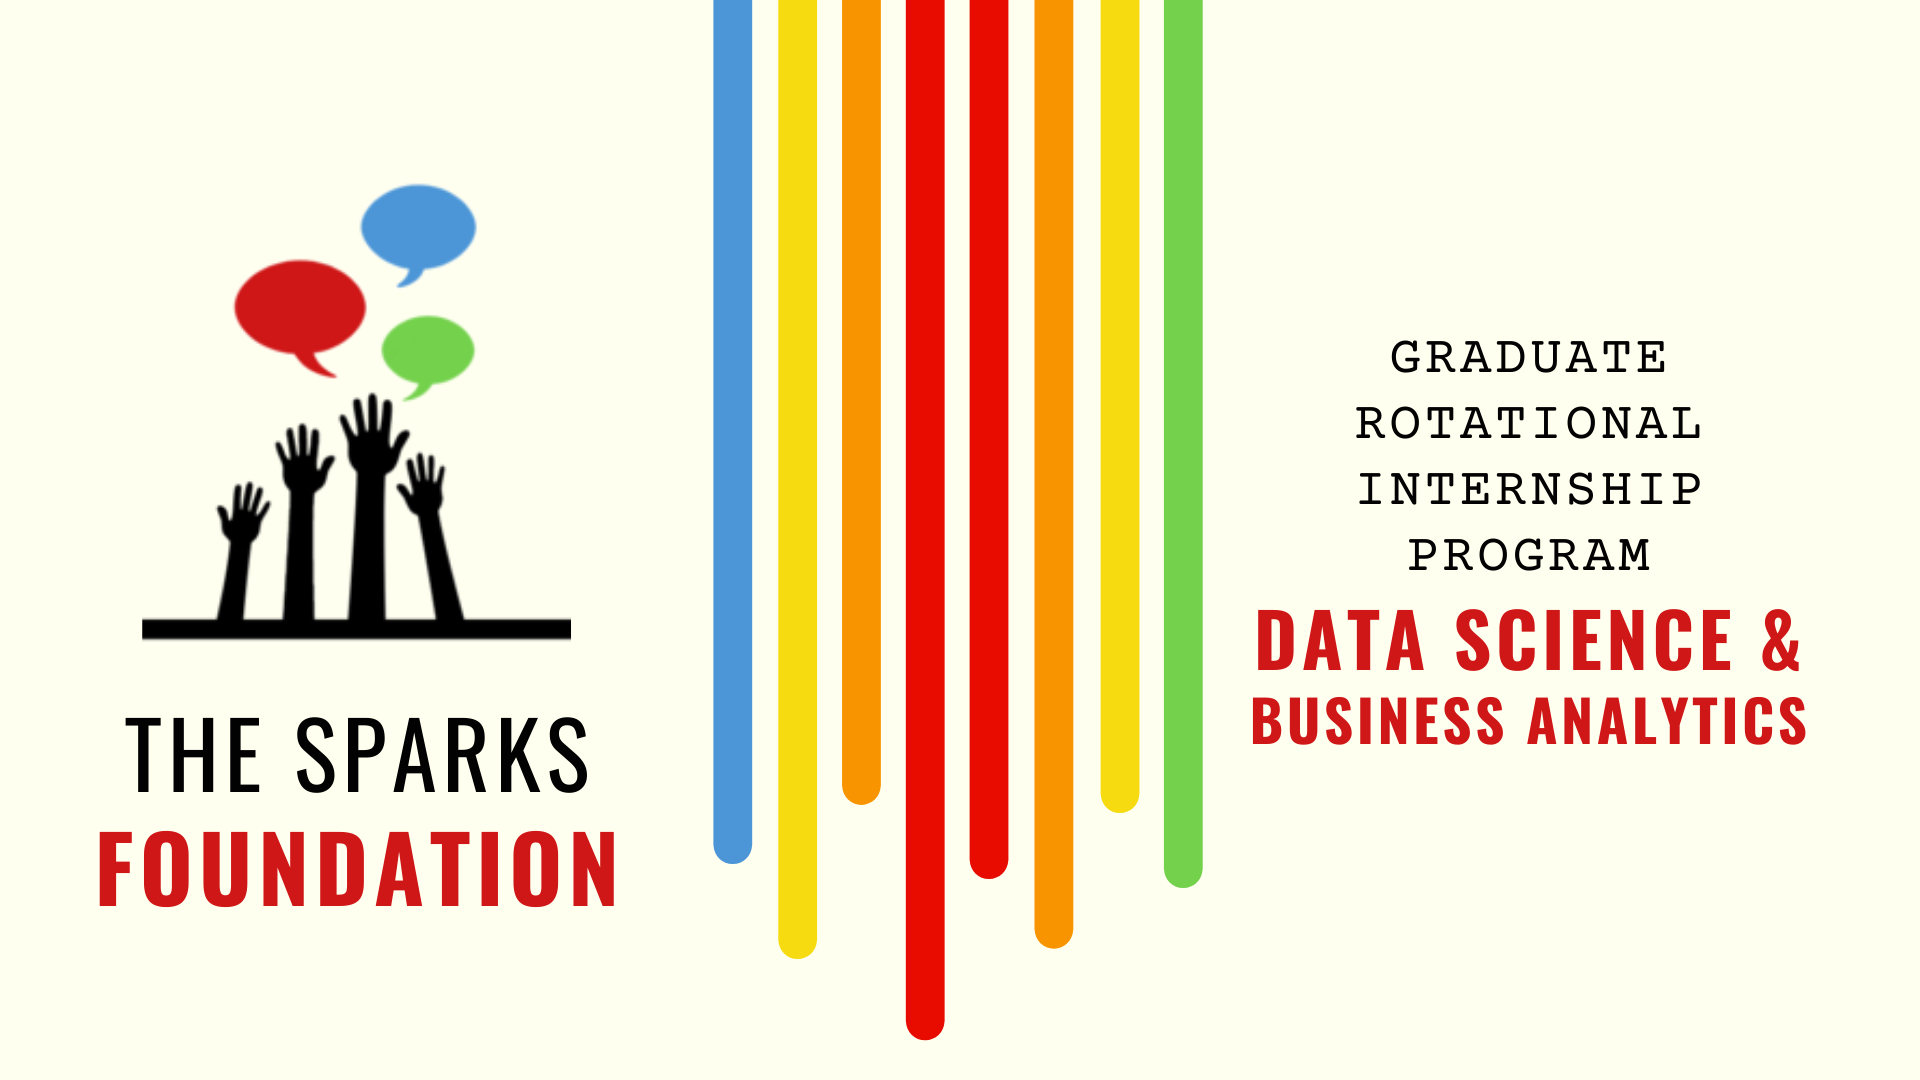

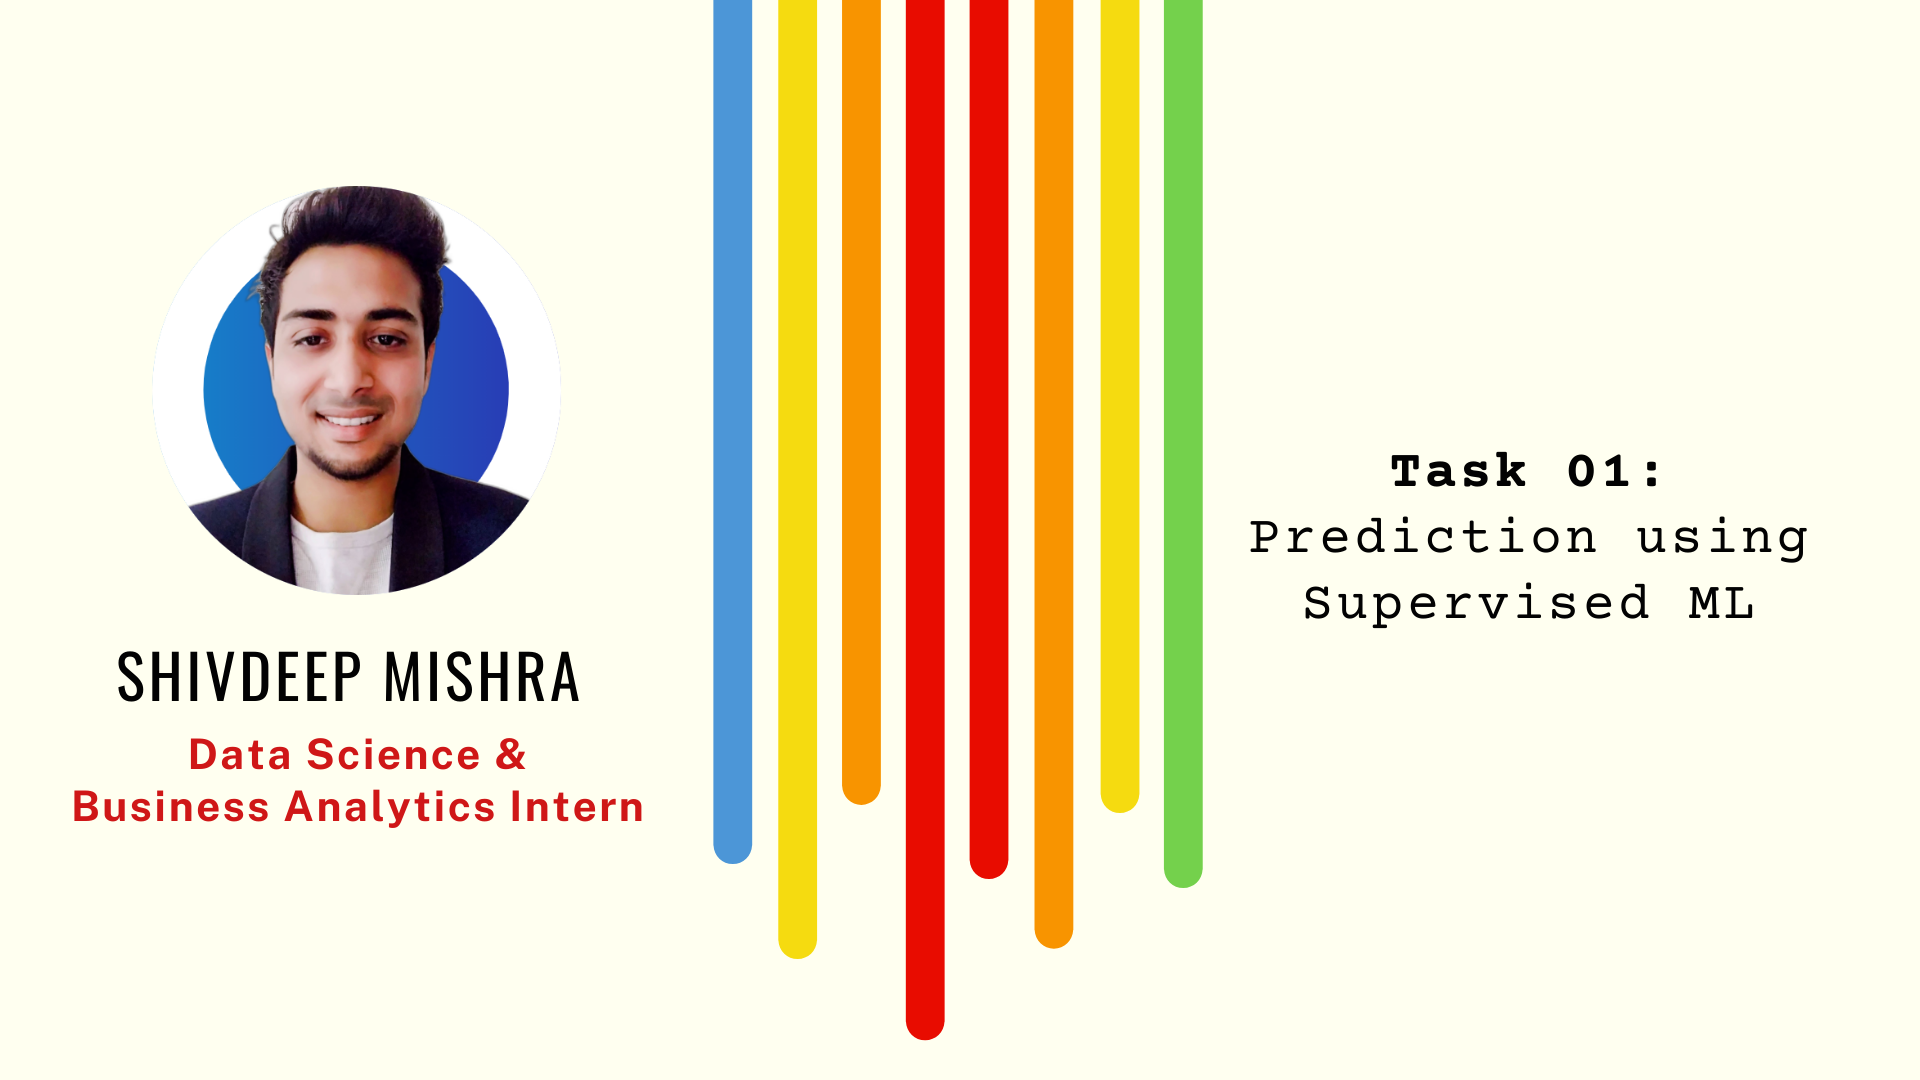

## Task 
● Predict the percentage of an student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables

## Importing the data

In [174]:
# importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [175]:
# importing the data
df = pd.read_csv("http://bit.ly/w-data")

## Exploratory Data Analysis

We have just imported the libraries which are going to be used in this task. Now let's explore the data checking datatypes, null values, shape of dataset, relationship between the feature and target value, etc.

In [176]:
# exploring top 5 rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [177]:
# exploring bottom 5 rows
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [178]:
# checking the number of columns and rows in dataset
df.shape

(25, 2)

In [179]:
# checking the types of data and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


Above we see that the dataset has two columns and 25 rows. And it doesn't have any null value in either column. It contains two types of data, float and integer type. Let's summarize the data.

In [180]:
# summarizing the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Let's plot the data and check the relation between data manually by using seaborn and matplotlib libraries.

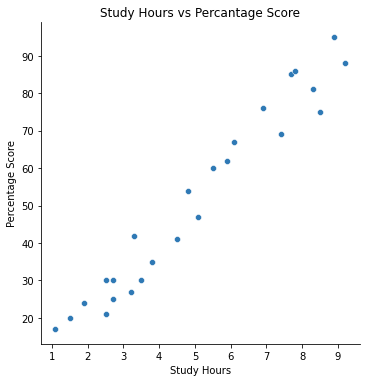

In [308]:
# plotting the data
sns.set_palette("RdBu_r")
sns.relplot(x = 'Hours', y = 'Scores', data = df)
plt.xlabel("Study Hours")
plt.ylabel("Percentage Score")
plt.title("Study Hours vs Percantage Score")
plt.show()

We can assume clearly that there is strong positive relation between Hour and Score column. Let's confirm it by checking Correlation matrix.

In [309]:
# checking correlation of columns
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Here it confirms our assumtion that there is strong positive linear relation between both the columns.

## Preparing the Data

Let's divide the dataset into attributes (inputs) and target (output).

In [310]:
# attribute
X = df.iloc[:, :-1].values

# target
y = df.iloc[:, 1].values

We got our attributes and target, now we are going to split these into train and test set.

In [311]:
# splitting into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Training the algorithm

We have our training and testing data with us, now we are going to train our data by using Linear Regression algorithm.

In [312]:
# instantiating the regressor
reg = LinearRegression()

# fitting the data to the model
reg.fit(X_train, y_train)

LinearRegression()

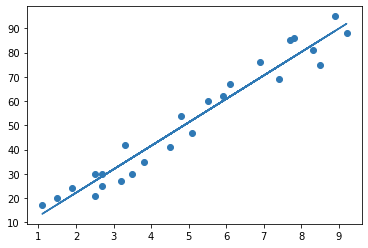

In [313]:
# plotting the regression line
line = reg.coef_ * X + reg.intercept_

# plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

## Making predictions

In [314]:
# predicting score
y_pred = reg.predict(X_test)

In [315]:
# comparing actual vs predicted
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

actual_vs_predicted

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


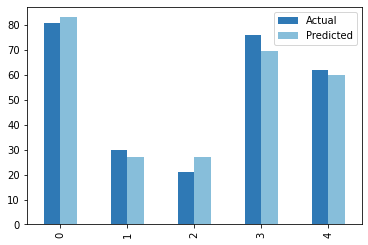

In [316]:
# plotting the actual vs predicted
actual_vs_predicted.plot(kind = 'bar')
plt.show()

In [317]:
# predicting score if a student studies for 9.25 hrs/ day
hour = np.array([9.25]).reshape(-1, 1)
predicted_score = reg.predict(hour)

print(f"If a student studies for 9.25 hrs/ day, predicted score will be {predicted_score[0]}.")

If a student studies for 9.25 hrs/ day, predicted score will be 92.38611528261494.


## Evaluating the Model

Let's evaluate the model performance.

In [328]:
print("Mean Squared Error: {} \nRoot Mean Squared Error: {} \nMean Absolute Error: {}"
      .format(metrics.mean_squared_error(y_test, y_pred),
              np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
              metrics.mean_absolute_error(y_test, y_pred)))

Mean Squared Error: 18.943211722315272 
Root Mean Squared Error: 4.352380006653288 
Mean Absolute Error: 3.9207511902099244
